<a href="https://colab.research.google.com/github/cbonafin/MachineLearningENEM2016/blob/master/Enem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dependencies

In [2]:
!pip install mlxtend

# Kaggle acccess

In [0]:
import os
os.environ['KAGGLE_USERNAME'] = "alexanderlmx"
os.environ['KAGGLE_KEY'] = "c541c1d09fe8fc026c9f1b6659ad6236"

# Download dataset

In [4]:
!kaggle datasets download -d gbonesso/enem-2016 -f microdados_enem_2016_coma.csv
!unzip -n microdados_enem_2016_coma.csv.zip
!ls

 98% 1.12G/1.14G [00:07<00:00, 192MB/s]
100% 1.14G/1.14G [00:07<00:00, 155MB/s]
Archive:  microdados_enem_2016_coma.csv.zip
  inflating: microdados_enem_2016_coma.csv  
microdados_enem_2016_coma.csv  microdados_enem_2016_coma.csv.zip  sample_data


# Clean unused columns

In [0]:
# ignore: attribute is irrelevant for ML model
# NA: attribute contains too many empty values

data_useful = [
    # 'NU_INSCRICAO',               ignore
    # 'NU_ANO',                     ignore
    # 'CO_MUNICIPIO_RESIDENCIA',    ignore
    # 'NO_MUNICIPIO_RESIDENCIA',    ignore
    # 'CO_UF_RESIDENCIA',           ignore
    'SG_UF_RESIDENCIA',
    'NU_IDADE',
    'TP_SEXO',
    'TP_ESTADO_CIVIL',
    'TP_COR_RACA',
    'TP_NACIONALIDADE',
    # 'CO_MUNICIPIO_NASCIMENTO',    ignore
    # 'NO_MUNICIPIO_NASCIMENTO',    ignore
    # 'CO_UF_NASCIMENTO',           ignore
    # 'SG_UF_NASCIMENTO',           ignore
    'TP_ST_CONCLUSAO',
    'TP_ANO_CONCLUIU',
    'TP_ESCOLA',
    # 'TP_ENSINO',                  6740902 NA
    'IN_TREINEIRO',
    # 'CO_ESCOLA',                  ignore
    # 'CO_MUNICIPIO_ESC',           ignore
    # 'NO_MUNICIPIO_ESC',           ignore
    # 'CO_UF_ESC',                  ignore
    # 'SG_UF_ESC',                  ignore
    # 'TP_DEPENDENCIA_ADM_ESC',     ignore
    # 'TP_LOCALIZACAO_ESC',         ignore
    # 'TP_SIT_FUNC_ESC',            ignore
    'IN_BAIXA_VISAO',
    # 'IN_CEGUEIRA',                1156    NA
    # 'IN_SURDEZ',                  2287    NA
    # 'IN_DEFICIENCIA_AUDITIVA',    7130    NA
    # 'IN_SURDO_CEGUEIRA',          23      NA
    'IN_DEFICIENCIA_FISICA',
    # 'IN_DEFICIENCIA_MENTAL',      1107    NA
    # 'IN_DEFICIT_ATENCAO',         5299    NA
    # 'IN_DISLEXIA',                1438    NA
    # 'IN_DISCALCULIA',             342     NA
    # 'IN_AUTISMO',                 372     NA
    # 'IN_VISAO_MONOCULAR',         3743    NA
    # 'IN_OUTRA_DEF',               3530    NA
    'IN_SABATISTA',
    # 'IN_GESTANTE',                7578    NA
    'IN_LACTANTE',
    # 'IN_IDOSO',                   1454    NA
    # 'IN_ESTUDA_CLASSE_HOSPITALAR',38      NA
    'IN_SEM_RECURSO',
    # 'IN_BRAILLE',                 560     NA
    # 'IN_AMPLIADA_24',             2121    NA
    # 'IN_AMPLIADA_18',             7301
    # 'IN_LEDOR',                   7092
    'IN_ACESSO',
    # 'IN_TRANSCRICAO',             7051        NA
    # 'IN_LIBRAS',                  3557        NA
    # 'IN_LEITURA_LABIAL',          1624        NA
    # 'IN_MESA_CADEIRA_RODAS',      2963        NA
    # 'IN_MESA_CADEIRA_SEPARADA',   5903        NA
    # 'IN_APOIO_PERNA',             3841        NA
    # 'IN_GUIA_INTERPRETE',         15      NA
    # 'IN_MACA',                    7       NA
    # 'IN_COMPUTADOR',              9       NA
    # 'IN_CADEIRA_ESPECIAL',        38      NA
    # 'IN_CADEIRA_CANHOTO',         31      NA
    # 'IN_CADEIRA_ACOLCHOADA',      282     NA
    # 'IN_PROVA_DEITADO',           3       NA
    # 'IN_MOBILIARIO_OBESO',        55      NA
    # 'IN_LAMINA_OVERLAY',          20      NA
    # 'IN_PROTETOR_AURICULAR',      4       NA
    # 'IN_MEDIDOR_GLICOSE',         346     NA
    # 'IN_MAQUINA_BRAILE',          92      NA
    # 'IN_SOROBAN',                 28      NA
    # 'IN_MARCA_PASSO',             13      NA
    # 'IN_SONDA',                   16      NA
    # 'IN_MEDICAMENTOS',            334     NA
    # 'IN_SALA_INDIVIDUAL',         366     NA
    # 'IN_SALA_ESPECIAL',           283     NA
    # 'IN_SALA_ACOMPANHANTE',       102     NA
    # 'IN_MOBILIARIO_ESPECIFICO',   30      NA
    # 'IN_MATERIAL_ESPECIFICO',     134     NA
    # 'IN_NOME_SOCIAL',             431     NA
    'TP_PRESENCA_CN',
    'TP_PRESENCA_CH',
    'TP_PRESENCA_LC',
    'TP_PRESENCA_MT',
    'NU_NOTA_CN',
    'NU_NOTA_CH',
    'NU_NOTA_LC',
    'NU_NOTA_MT',
    'TP_STATUS_REDACAO',
    'NU_NOTA_COMP1',
    'NU_NOTA_COMP2',
    'NU_NOTA_COMP3',
    'NU_NOTA_COMP4',
    'NU_NOTA_COMP5',
    'NU_NOTA_REDACAO',
    'Q001',
    'Q002',
    'Q003',
    'Q004',
    'Q005',
    'Q006',
    'Q007',
    'Q008',
    'Q009',
    'Q010',
    'Q011',
    'Q012',
    'Q013',
    'Q014',
    'Q015',
    'Q016',
    'Q017',
    'Q018',
    'Q019',
    'Q020',
    'Q021',
    'Q022',
    'Q023',
    'Q024',
    'Q025',
    'Q026',
    # 'Q027',                       3836300 NA
    # 'Q028',                       3836633 NA
    # 'Q029',                       3836932 NA
    # 'Q030',                       3837101 NA
    # 'Q031',                       3837151 NA
    # 'Q032',                       3837200 NA
    # 'Q033',                       3837241 NA
    'Q034',
    'Q035',
    'Q036',
    'Q037',
    'Q038',
    'Q039',
    'Q040',
    # 'Q041',                       6137533 NA
    'Q042',
    'Q043',
    'Q044',
    'Q045',
    'Q046',
    'Q047',
    'Q048',
    'Q049',
    'Q050'
    ]


In [6]:
# Removes lines with less or more than 166 commas
# Replaces single and double quotes by spaces
# Saves the new data file using UTF-8 format

# remove_empty: true to delete lines with missing values, false to keep lines
def main(remove_empty):
    load_file = "microdados_enem_2016_coma.csv"
    save_file = "enem_data_converted.csv"

    header = None
    valid = [0] * len(data_useful)

    with open(load_file, 'r', encoding='iso-8859-1') as file_loaded:
        print("Loading data from file " + load_file + "...")      
        with open(save_file, 'w', encoding='utf-8') as f:
            for idx, line in enumerate(file_loaded):
                parts = line.strip().split(',')
                if idx == 0:
                    header = parts
                    for i in range(len(valid)):
                        valid[i] = header.index(data_useful[i])

                count = len(parts) 
                if count != 166:
                    # print("Removed line " + str(idx) + " [Invalid columns]")
                    pass
                elif remove_empty and '' in parts:
                    # print("Removed line " + str(idx) + " [Empty fields]")
                    pass
                else:
                    useful = [parts[i] for i in valid]
                    line = ','.join(useful)
                    if "'" in line:
                        line = line.replace("'", " ")
                        # print("Removed single quote from line " + str(idx))
                    if '"' in line:
                        line = line.replace('"', " ")
                        # print("Removed double quote from line " + str(idx))
                    f.write(line+'\n')
        print("Data has been prepared for analysis!")


main(remove_empty = False)

Loading data from file microdados_enem_2016_coma.csv...
Data has been prepared for analysis!


# Load dataset

In [4]:
import pandas as pd
data = pd.read_csv("enem_data_converted.csv")
data.head() 

,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,IN_BAIXA_VISAO,IN_DEFICIENCIA_FISICA,IN_SABATISTA,IN_LACTANTE,IN_SEM_RECURSO,IN_ACESSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,PB,23.0,M,0.0,3,1,1,7,1,0,0,0,0,0,0,0,1.0,1.0,1.0,1.0,550.0,629.4,574.0,462.9,1.0,120.0,120.0,100.0,120.0,120.0,580.0,E,E,D,D,2.0,B,A,B,C,A,A,B,A,A,A,A,A,A,C,B,B,C,B,B,B,A,0.0,5.0,5.0,5.0,5.0,2.0,5.0,C,A,A,A,A,D,A,A,A
1,PR,20.0,M,0.0,1,1,1,3,1,0,0,0,0,0,0,0,1.0,1.0,1.0,1.0,576.6,669.8,610.1,423.6,1.0,120.0,120.0,120.0,120.0,80.0,560.0,H,H,F,F,5.0,D,A,B,D,B,A,B,B,B,A,B,A,A,B,B,A,C,B,B,B,A,0.0,5.0,5.0,5.0,5.0,5.0,5.0,A,A,A,A,A,D,A,A,C
2,BA,21.0,M,0.0,3,1,1,1,1,0,0,0,0,0,0,0,1.0,1.0,1.0,1.0,485.8,576.9,637.4,414.6,1.0,120.0,100.0,80.0,80.0,100.0,480.0,B,E,D,D,3.0,D,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,C,B,B,B,A,5.0,5.0,3.0,5.0,3.0,5.0,5.0,B,A,B,A,A,A,D,A,C
3,PA,17.0,M,0.0,1,1,1,1,1,0,0,0,1,0,0,0,1.0,1.0,1.0,1.0,571.4,628.6,646.2,709.4,1.0,120.0,120.0,120.0,140.0,120.0,620.0,E,E,E,D,5.0,B,A,B,B,A,A,B,B,B,A,A,A,A,B,B,A,B,A,A,B,A,5.0,5.0,3.0,4.0,3.0,5.0,5.0,D,A,A,A,A,E,A,A,A
4,DF,36.0,F,2.0,1,1,1,10,1,0,0,1,1,0,1,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,A,A,A,20.0,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A,A,A,A,A,A,A,A,A


# Fix dataset

In [5]:
import numpy as np

print('NaN NU_IDADE: ', sum(pd.isnull(data['NU_IDADE'])))
data.dropna(subset=['NU_IDADE'], how='all', inplace = True)
print('NaN NU_IDADE: ', sum(pd.isnull(data['NU_IDADE'])))

print('NaN Q005: ', sum(pd.isnull(data['Q005'])))
data.dropna(subset=['Q005'], how='all', inplace = True)
print('NaN Q005: ', sum(pd.isnull(data['Q005'])))

print('NaN TP_ESTADO_CIVIL: ', sum(pd.isnull(data['TP_ESTADO_CIVIL'])))
data['TP_ESTADO_CIVIL'].replace({np.nan: 0}, inplace=True)
print('NaN TP_ESTADO_CIVIL: ', sum(pd.isnull(data['TP_ESTADO_CIVIL'])))

print('NaN TP_PRESENCA_CN: ', sum(pd.isnull(data['TP_PRESENCA_CN'])))
data['TP_PRESENCA_CN'].replace({np.nan: 0}, inplace=True)
print('NaN TP_PRESENCA_CN: ', sum(pd.isnull(data['TP_PRESENCA_CN'])))

print('NaN TP_PRESENCA_CH: ', sum(pd.isnull(data['TP_PRESENCA_CH'])))
data['TP_PRESENCA_CH'].replace({np.nan: 0}, inplace=True)
print('NaN TP_PRESENCA_CH: ', sum(pd.isnull(data['TP_PRESENCA_CH'])))

print('NaN TP_PRESENCA_LC: ', sum(pd.isnull(data['TP_PRESENCA_LC'])))
data['TP_PRESENCA_LC'].replace({np.nan: 0}, inplace=True)
print('NaN TP_PRESENCA_LC: ', sum(pd.isnull(data['TP_PRESENCA_LC'])))

print('NaN TP_PRESENCA_MT: ', sum(pd.isnull(data['TP_PRESENCA_MT'])))
data['TP_PRESENCA_MT'].replace({np.nan: 0}, inplace=True)
print('NaN TP_PRESENCA_MT: ', sum(pd.isnull(data['TP_PRESENCA_MT'])))

print('NaN NU_NOTA_CN: ', sum(pd.isnull(data['NU_NOTA_CN'])))
data['NU_NOTA_CN'].replace({np.nan: 0}, inplace=True)
print('NaN NU_NOTA_CN: ', sum(pd.isnull(data['NU_NOTA_CN'])))

print('NaN NU_NOTA_CH: ', sum(pd.isnull(data['NU_NOTA_CH'])))
data['NU_NOTA_CH'].replace({np.nan: 0}, inplace=True)
print('NaN NU_NOTA_CH: ', sum(pd.isnull(data['NU_NOTA_CH'])))

print('NaN NU_NOTA_LC: ', sum(pd.isnull(data['NU_NOTA_LC'])))
data['NU_NOTA_LC'].replace({np.nan: 0}, inplace=True)
print('NaN NU_NOTA_LC: ', sum(pd.isnull(data['NU_NOTA_LC'])))

print('NaN NU_NOTA_MT: ', sum(pd.isnull(data['NU_NOTA_MT'])))
data['NU_NOTA_MT'].replace({np.nan: 0}, inplace=True)
print('NaN NU_NOTA_MT: ', sum(pd.isnull(data['NU_NOTA_MT'])))

print('NaN TP_STATUS_REDACAO: ', sum(pd.isnull(data['TP_STATUS_REDACAO'])))
data['TP_STATUS_REDACAO'].replace({np.nan: 1}, inplace=True)
print('NaN TP_STATUS_REDACAO: ', sum(pd.isnull(data['TP_STATUS_REDACAO'])))

print('NaN NU_NOTA_COMP1: ', sum(pd.isnull(data['NU_NOTA_COMP1'])))
data['NU_NOTA_COMP1'].replace({np.nan: 0}, inplace=True)
print('NaN NU_NOTA_COMP1: ', sum(pd.isnull(data['NU_NOTA_COMP1'])))

print('NaN NU_NOTA_COMP2: ', sum(pd.isnull(data['NU_NOTA_COMP2'])))
data['NU_NOTA_COMP2'].replace({np.nan: 0}, inplace=True)
print('NaN NU_NOTA_COMP2: ', sum(pd.isnull(data['NU_NOTA_COMP2'])))

print('NaN NU_NOTA_COMP3: ', sum(pd.isnull(data['NU_NOTA_COMP3'])))
data['NU_NOTA_COMP3'].replace({np.nan: 0}, inplace=True)
print('NaN NU_NOTA_COMP3: ', sum(pd.isnull(data['NU_NOTA_COMP3'])))

print('NaN NU_NOTA_COMP4: ', sum(pd.isnull(data['NU_NOTA_COMP4'])))
data['NU_NOTA_COMP4'].replace({np.nan: 0}, inplace=True)
print('NaN NU_NOTA_COMP4: ', sum(pd.isnull(data['NU_NOTA_COMP4'])))

print('NaN NU_NOTA_COMP5: ', sum(pd.isnull(data['NU_NOTA_COMP5'])))
data['NU_NOTA_COMP5'].replace({np.nan: 0}, inplace=True)
print('NaN NU_NOTA_COMP5: ', sum(pd.isnull(data['NU_NOTA_COMP5'])))

print('NaN NU_NOTA_REDACAO: ', sum(pd.isnull(data['NU_NOTA_REDACAO'])))
data['NU_NOTA_REDACAO'].replace({np.nan: 0}, inplace=True)
print('NaN NU_NOTA_REDACAO: ', sum(pd.isnull(data['NU_NOTA_REDACAO'])))

print('Empty Q001: ', (data['Q001'].values == '').sum() )
data['Q001'].replace({'': 'H'}, inplace=True)
print('Empty Q001: ', (data['Q001'].values == '').sum() )

print('Empty Q002: ', (data['Q002'].values == '').sum() )
data['Q002'].replace({'': 'H'}, inplace=True)
print('Empty Q002: ', (data['Q002'].values == '').sum() )

print('Empty Q003: ', (data['Q003'].values == '').sum() )
data['Q003'].replace({'': 'H'}, inplace=True)
print('Empty Q003: ', (data['Q003'].values == '').sum() )

print('Empty Q004: ', (data['Q004'].values == '').sum() )
data['Q004'].replace({'': 'H'}, inplace=True)
print('Empty Q004: ', (data['Q004'].values == '').sum() )



NaN NU_IDADE:  102
NaN NU_IDADE:  0
NaN Q005:  4
NaN Q005:  0
NaN TP_ESTADO_CIVIL:  379959
NaN TP_ESTADO_CIVIL:  0
NaN TP_PRESENCA_CN:  373
NaN TP_PRESENCA_CN:  0
NaN TP_PRESENCA_CH:  373
NaN TP_PRESENCA_CH:  0
NaN TP_PRESENCA_LC:  373
NaN TP_PRESENCA_LC:  0
NaN TP_PRESENCA_MT:  373
NaN TP_PRESENCA_MT:  0
NaN NU_NOTA_CN:  2625181
NaN NU_NOTA_CN:  0
NaN NU_NOTA_CH:  2625181
NaN NU_NOTA_CH:  0
NaN NU_NOTA_LC:  2779151
NaN NU_NOTA_LC:  0
NaN NU_NOTA_MT:  2779151
NaN NU_NOTA_MT:  0
NaN TP_STATUS_REDACAO:  2779151
NaN TP_STATUS_REDACAO:  0
NaN NU_NOTA_COMP1:  2779151
NaN NU_NOTA_COMP1:  0
NaN NU_NOTA_COMP2:  2779151
NaN NU_NOTA_COMP2:  0
NaN NU_NOTA_COMP3:  2779151
NaN NU_NOTA_COMP3:  0
NaN NU_NOTA_COMP4:  2779151
NaN NU_NOTA_COMP4:  0
NaN NU_NOTA_COMP5:  2779151
NaN NU_NOTA_COMP5:  0
NaN NU_NOTA_REDACAO:  2779151
NaN NU_NOTA_REDACAO:  0
Empty Q001:  0
Empty Q001:  0
Empty Q002:  0
Empty Q002:  0
Empty Q003:  0
Empty Q003:  0
Empty Q004:  0
Empty Q004:  0


In [0]:
data['NU_NOTA'] = (data['NU_NOTA_CH'] + 
                   data['NU_NOTA_CN'] + 
                   data['NU_NOTA_LC'] +
                   data['NU_NOTA_MT'] +
                   data['NU_NOTA_REDACAO']) / 5

data['NOTA'] = pd.cut(data['NU_NOTA'], [-np.inf,200,400,600,800,np.inf], labels=['E', 'D', 'C', 'B', 'A'], include_lowest=True)
data['IDADE'] = pd.cut(data['NU_IDADE'], [-np.inf,20,35,50,70,np.inf], labels=['A', 'B', 'C', 'D', 'E'], include_lowest=True)

In [7]:
print('Total: ', (len(data) + 102 + 4))
print('NOTA A: ', (data.NOTA == 'A').sum())
print('NOTA B: ', (data.NOTA == 'B').sum())
print('NOTA C: ', (data.NOTA == 'C').sum())
print('NOTA D: ', (data.NOTA == 'D').sum())
print('NOTA E: ', (data.NOTA == 'E').sum())
NU_FALTANTES = ((data.TP_PRESENCA_CH == 0) & (data.TP_PRESENCA_MT == 0)).sum()
print('Faltantes CN: ', (data.TP_PRESENCA_CN == 0).sum())
print('Faltantes CH: ', (data.TP_PRESENCA_CH == 0).sum())
print('Faltantes MT: ', (data.TP_PRESENCA_MT == 0).sum())
print('Faltantes LC: ', (data.TP_PRESENCA_LC == 0).sum())
print('Faltantes: %d ( %f%% )' % (NU_FALTANTES, NU_FALTANTES/len(data)))

Total:  8620630
NOTA A:  1328
NOTA B:  710344
NOTA C:  4869161
NOTA D:  317806
NOTA E:  2721885
Faltantes CN:  2621477
Faltantes CH:  2621477
Faltantes MT:  2774524
Faltantes LC:  2774524
Faltantes: 2596096 ( 0.301153% )


In [0]:
def encode_target(df, target_column):
    """Add column to df with integers for the target.

    Args
    ----
    df -- pandas DataFrame.
    target_column -- column to map to int, producing
                     new Target column.

    Returns
    -------
    df_mod -- modified DataFrame.
    targets -- list of target names.
    """  
    targets = df[target_column].unique()
    if df[target_column].dtype == np.number:
      return targets
    map_to_int = {name: n for n, name in enumerate(targets)}
    df[target_column].replace(map_to_int, inplace=True)

    return targets

# Decision Tree

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Cross-Training:  0.627095
Cross-Test:  0.24291
The binary tree structure has 67 nodes and has the following tree structure:
node=0 test node: go to node 1 if X[:, 1] <= 19.5 else to node 28.
	node=1 test node: go to node 2 if X[:, 60] <= 0.5 else to node 25.
		node=2 test node: go to node 3 if X[:, 1] <= 17.5 else to node 14.
			node=3 test node: go to node 4 if X[:, 1] <= 16.5 else to node 7.
				node=4 test node: go to node 5 if X[:, 53] <= 0.5 else to node 6.
					node=5 leaf node.
					node=6 leaf node.
				node=7 test node: go to node 8 if X[:, 0] <= 5.5 else to node 11.
					node=8 test node: go to node 9 if X[:, 58] <= 0.5 else to node 10.
						node=9 leaf node.
						node=10 leaf node.
					node=11 test node: go to node 12 if X[:, 34] <= 0.5 else to node 13.
						node=12 leaf node.
						node=13 leaf node.
			node=14 test node: go to node 15 if X[:, 0] <= 5.5 else to node 20.
				node=15 test node: go to node 16 if X[:, 58] <= 0.5 else to node 19.
					node=16 test node: go t

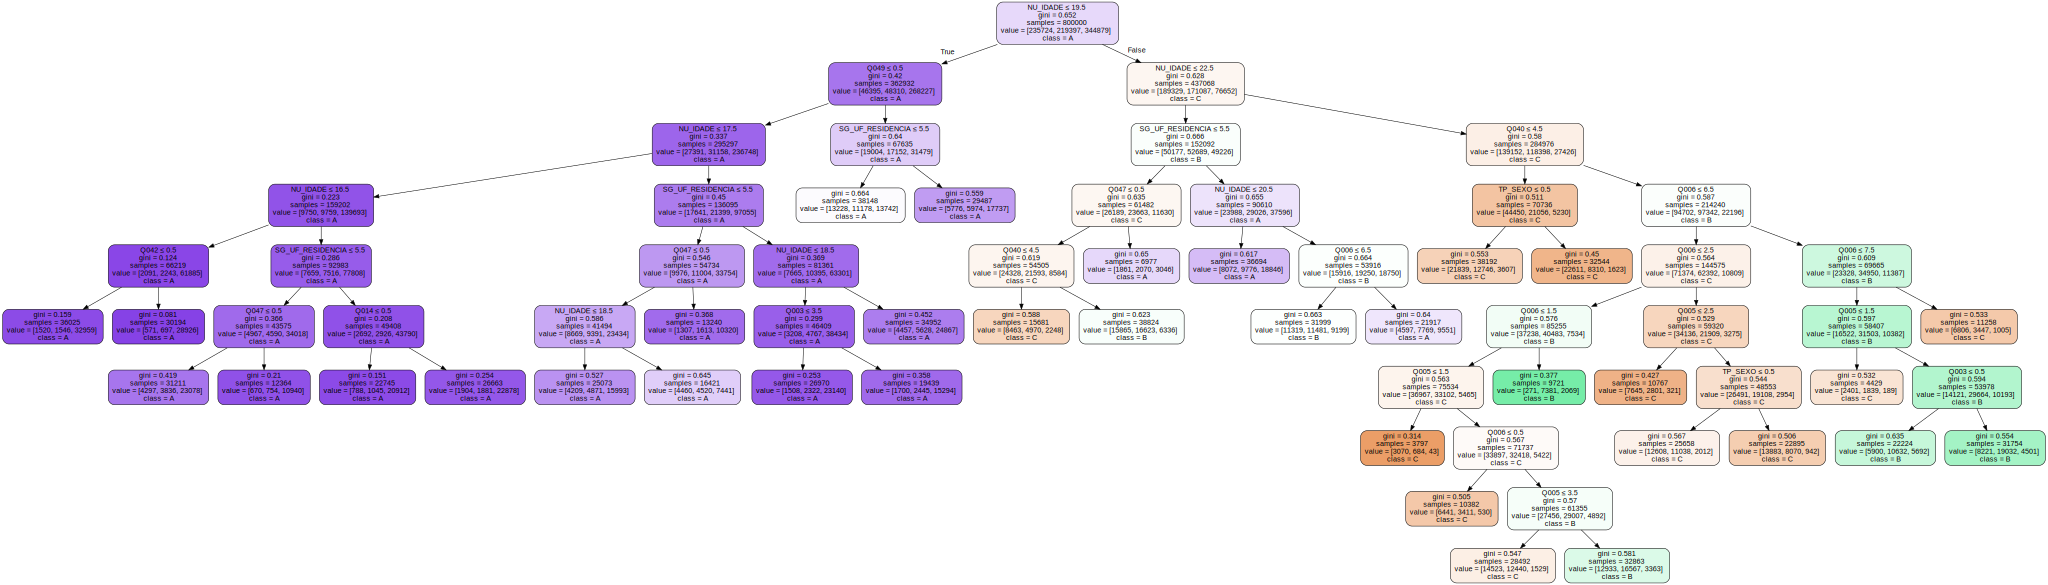

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import tree
import graphviz 

dataset = data.sample(n=4000000)
training_set, test_set = train_test_split(dataset, test_size=0.8)

features = data_useful.copy() #['Q006', 'Q007', 'Q008', 'Q024', 'Q025']
undesired_features = ['NU_NOTA_CN', 
                      'NU_NOTA_CH',
                      'NU_NOTA_LC',
                      'NU_NOTA_MT',
                      'NU_NOTA_COMP1',
                      'NU_NOTA_COMP2',
                      'NU_NOTA_COMP3',
                      'NU_NOTA_COMP4',
                      'NU_NOTA_COMP5',
                      'NU_NOTA_REDACAO',
                      'Q026'
                      #'Q044',
                      #'Q049',
                      #'TP_PRESENCA_CN',
                      #'TP_PRESENCA_CH',
                      #'TP_PRESENCA_LC',
                      #'TP_PRESENCA_MT',
                      #'TP_STATUS_REDACAO'
                      ]
for i in range(len(undesired_features)):
  features.remove(undesired_features[i])

target = 'Q026'

targets = {}

for i in range(len(features)):
  targets[ features[i] ] = encode_target(training_set, features[i])
  encode_target(test_set, features[i])

target_names = encode_target(training_set, target)
encode_target(test_set, target)

training_y = training_set[target]
training_X = training_set[features]

test_y = test_set[target]
test_X = test_set[features]

clf = tree.DecisionTreeClassifier(min_samples_split=0.05, random_state=0)
#clf = tree.DecisionTreeClassifier()
clf = clf.fit(training_X, training_y)
cross_training = clf.score(training_X, training_y)
cross_test = clf.score(test_X, test_y)

print("Cross-Training: ", cross_training)
print("Cross-Test: ", cross_test)

# The decision estimator has an attribute called tree_  which stores the entire
# tree structure and allows access to low level attributes. The binary tree
# tree_ is represented as a number of parallel arrays. The i-th element of each
# array holds information about the node `i`. Node 0 is the tree's root. NOTE:
# Some of the arrays only apply to either leaves or split nodes, resp. In this
# case the values of nodes of the other type are arbitrary!
#
# Among those arrays, we have:
#   - left_child, id of the left child of the node
#   - right_child, id of the right child of the node
#   - feature, feature used for splitting the node
#   - threshold, threshold value at the node
#

# Using those arrays, we can parse the tree structure:
estimator = clf
n_nodes = estimator.tree_.node_count
children_left = estimator.tree_.children_left
children_right = estimator.tree_.children_right
feature = estimator.tree_.feature
threshold = estimator.tree_.threshold


# The tree structure can be traversed to compute various properties such
# as the depth of each node and whether or not it is a leaf.
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]  # seed is the root node id and its parent depth
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    # If we have a test node
    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

print("The binary tree structure has %s nodes and has "
      "the following tree structure:"
      % n_nodes)
for i in range(n_nodes):
    if is_leaves[i]:
        print("%snode=%s leaf node." % (node_depth[i] * "\t", i))
    else:
        print("%snode=%s test node: go to node %s if X[:, %s] <= %s else to "
              "node %s."
              % (node_depth[i] * "\t",
                 i,
                 children_left[i],
                 feature[i],
                 threshold[i],
                 children_right[i],
                 ))
print()

# First let's retrieve the decision path of each sample. The decision_path
# method allows to retrieve the node indicator functions. A non zero element of
# indicator matrix at the position (i, j) indicates that the sample i goes
# through the node j.

node_indicator = estimator.decision_path(test_X)

# Similarly, we can also have the leaves ids reached by each sample.

leave_id = estimator.apply(test_X)

dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=features,
                                class_names=target_names,
                                filled=True, rounded=True,
                                special_characters=True) 
graph = graphviz.Source(dot_data)
graph.render("tree_"+target)
graph 

# Random Forest

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import graphviz 

dataset = data.sample(n=1000000)
training_set, test_set = train_test_split(dataset, test_size=0.8)

features = data_useful.copy() #['Q006', 'Q007', 'Q008', 'Q024', 'Q025']
undesired_features = [#'NU_NOTA_CN', 
                      #'NU_NOTA_CH',
                      #'NU_NOTA_LC',
                      #'NU_NOTA_MT',
                      #'NU_NOTA_COMP1',
                      #'NU_NOTA_COMP2',
                      #'NU_NOTA_COMP3',
                      #'NU_NOTA_COMP4',
                      #'NU_NOTA_COMP5',
                      #'NU_NOTA_REDACAO',
                      #'Q006',
                      #'Q026'
                      'Q049',
                      #'Q044',
                      #'TP_PRESENCA_CN',
                      #'TP_PRESENCA_CH',
                      #'TP_PRESENCA_LC',
                      #'TP_PRESENCA_MT',
                      #'TP_STATUS_REDACAO'
                      ]
for i in range(len(undesired_features)):
  features.remove(undesired_features[i])

target = 'Q049'

targets = {}

for i in range(len(features)):
  targets[ features[i] ] = encode_target(training_set, features[i])
  encode_target(test_set, features[i])

target_names = encode_target(training_set, target)
encode_target(test_set, target)

training_y = training_set[target]
training_X = training_set[features]

test_y = test_set[target]
test_X = test_set[features]

clf = RandomForestClassifier(n_estimators=150, min_samples_split=0.05, max_depth=10, random_state=0)
#clf = tree.DecisionTreeClassifier()
clf = clf.fit(training_X, training_y)
cross_training = clf.score(training_X, training_y)
cross_test = clf.score(test_X, test_y)

print("Cross-Training: ", cross_training)
print("Cross-Test: ", cross_test)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Cross-Training:  0.69907
Cross-Test:  0.547965


# Neural Networks

In [14]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from keras.utils import plot_model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

dataset = data.sample(n=1000000)
training_set, test_set = train_test_split(dataset, test_size=0.5)

features = data_useful.copy() #['Q006', 'Q007', 'Q008', 'Q024', 'Q025']
undesired_features = ['NU_NOTA_CN', 
                      'NU_NOTA_CH',
                      'NU_NOTA_LC',
                      'NU_NOTA_MT',
                      'NU_NOTA_COMP1',
                      'NU_NOTA_COMP2',
                      'NU_NOTA_COMP3',
                      'NU_NOTA_COMP4',
                      'NU_NOTA_COMP5',
                      'NU_NOTA_REDACAO',
                      #'Q044',
                      #'Q049',
                      #'TP_PRESENCA_CN',
                      #'TP_PRESENCA_CH',
                      #'TP_PRESENCA_LC',
                      #'TP_PRESENCA_MT',
                      #'TP_STATUS_REDACAO'
                      ]
for i in range(len(undesired_features)):
  features.remove(undesired_features[i])

target = 'Q049'

targets = {}

for i in range(len(features)):
  targets[ features[i] ] = encode_target(training_set, features[i])
  encode_target(test_set, features[i])

target_names = encode_target(training_set, target)
encode_target(test_set, target)

training_y = training_set[target]
training_X = training_set[features]

test_y = test_set[target]
test_X = test_set[features]

sc = StandardScaler()
#X = sc.fit_transform(training_X)
X = training_X
y = training_y

#y = (y - y.mean()) / (y.max() - y.min())

#print(X)
#print(y)

print(X.shape)
in_size = X.shape[1]

# define the keras model
model = Sequential()
model.add(Dense(134, input_dim=in_size, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
history = model.fit(X, y, epochs=5, batch_size=10)
# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy Train: %.2f' % (accuracy*100))
_, accuracy = model.evaluate(test_X, test_y)
print('Accuracy Test: %.2f' % (accuracy*100))

model.save(target+'.h5')
plot_model(model, to_file=target+'_nn.png')

SVG(model_to_dot(model).create(prog='dot', format='svg'))

print(history.history)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig(target+'_acc.png')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig(target+'_loss.png')
plt.show()

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


(500000, 63)





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/5
179980/500000 [=========>....................] - ETA: 2:18 - loss: -2.5303 - acc: 0.8345

KeyboardInterrupt: ignored

# Naive Bayes

In [0]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import train_test_split

training_set = data.sample(n=10000)
test_set = data.sample(n=1000)

#features = data_useful.copy() #['Q006', 'Q007', 'Q008', 'Q024', 'Q025']
features = ['Q006', 'Q007', 'Q008', 'Q024', 'Q025']
undesired_features = ['NU_NOTA_CN', 
                      'NU_NOTA_CH',
                      'NU_NOTA_LC',
                      'NU_NOTA_MT',
                      'NU_NOTA_COMP1',
                      'NU_NOTA_COMP2',
                      'NU_NOTA_COMP3',
                      'NU_NOTA_COMP4',
                      'NU_NOTA_COMP5',
                      'NU_NOTA_REDACAO',
                      #'Q044',
                      #'Q049',
                      #'TP_PRESENCA_CN',
                      #'TP_PRESENCA_CH',
                      #'TP_PRESENCA_LC',
                      #'TP_PRESENCA_MT',
                      #'TP_STATUS_REDACAO'
                      ]
#for i in range(len(undesired_features)):
#  features.remove(undesired_features[i])

target = 'NOTA'

targets = {}

for i in range(len(features)):
  targets[ features[i] ] = encode_target(training_set, features[i])
  encode_target(test_set, features[i])

target_names = encode_target(training_set, target)
encode_target(test_set, target)

training_y = training_set[target]
training_X = training_set[features]

test_y = test_set[target]
test_X = test_set[features]


gnb = GaussianNB()
gnb.fit(training_X, training_y)
y_pred = gnb.predict(test_X)

print("Accuracy:", metrics.accuracy_score(test_y, y_pred))
print(metrics.classification_report(test_y, y_pred))
print(metrics.confusion_matrix(test_y, y_pred))

# Apriori

In [0]:
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.model_selection import train_test_split

store_data = data.sample(n=2000000)
#features = data_useful.copy()
features = ['Q006', 'NOTA', 'Q024', 'Q049', 'Q026', 'IDADE', 'Q001', 'Q002', 
            'TP_SEXO',
            'TP_ESTADO_CIVIL',
            'TP_COR_RACA']

# AFONSO features = ['Q005', 'Q006', 'Q009', 'Q047', 'NOTA']
undesired_features = ['NU_NOTA_CN', 
                      'NU_NOTA_CH',
                      'NU_NOTA_LC',
                      'NU_NOTA_MT',
                      'NU_NOTA_COMP1',
                      'NU_NOTA_COMP2',
                      'NU_NOTA_COMP3',
                      'NU_NOTA_COMP4',
                      'NU_NOTA_COMP5',
                      'NU_NOTA_REDACAO',
                      'NU_IDADE'
                      ]

#for i in range(len(undesired_features)):
#  features.remove(undesired_features[i])

store_data = store_data[features]
cat_data = pd.DataFrame()

for i in range(len(features)):
  df = pd.Categorical(store_data[features[i]])
  dfDummies = pd.get_dummies(df, prefix = features[i])
  cat_data = pd.concat([cat_data, dfDummies], axis=1)

print(len(cat_data.columns))

#targets = {}
#for i in range(len(features)):
#  targets[ features[i] ] = encode_target(store_data, features[i])



frq_items = apriori(cat_data, min_support = 0.001, use_colnames = True) 
  
# Collecting the inferred rules in a dataframe 
rules = association_rules(frq_items, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 

rules_2 = pd.DataFrame()
rules_2['ant'] = rules['antecedents']
rules_2['con'] = rules['consequents']
rules_2['cf'] = rules['confidence']

print(rules_2)
rules_2.to_excel('apriori.xlsx')

